<a href="https://colab.research.google.com/github/ImperatorMarsa/paper_boat_detection/blob/master/paper_boat_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

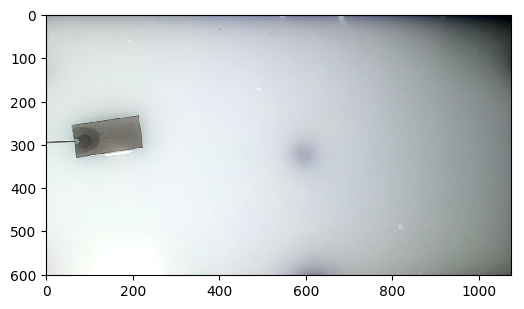

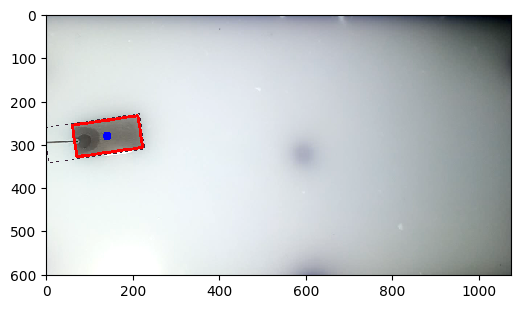

In [212]:
#%matplotlib inline
from matplotlib.pyplot import figure
from matplotlib import pyplot as plt
import sys
import numpy as np
import cv2
from random import random as rnd

def paper_boat_detect(img):
  blur1 = cv2.GaussianBlur(img, (5, 5), 0)
  edge = cv2.Canny(blur1,100,200) # применяем цветовой фильтр  
  blur2 = cv2.GaussianBlur(edge, (5, 5), 0)  
  _, contours0, hierarchy = cv2.findContours(blur2.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)  
  img2 = img.copy()
  center = (-1, -1)
  # перебираем все найденные контуры в цикле
  for cnt in contours0:
    rect = cv2.minAreaRect(cnt) # пытаемся вписать прямоугольник
    box = cv2.boxPoints(rect) # поиск четырех вершин прямоугольника
    box = np.int0(box) # округление координат
    pony.append(box)
    cv2.drawContours(img2, [box], 0, (100*rnd(), 100*rnd(), 100*rnd()), 1) # рисуем прямоугольник
    l1 = np.sqrt((box[0][0] - box[1][0])**2 + (box[0][1] - box[1][1])**2)
    l2 = np.sqrt((box[1][0] - box[2][0])**2 + (box[1][1] - box[2][1])**2)
    a1 = max([l1, l2])
    a2 = min([l1, l2])
    if 1.8 < a1 / a2 < 2.2 and a1 * a2 > 100:
      cv2.drawContours(img2, [box], 0, (255, 0, 0,), 5) # рисуем прямоугольник
      center = (
          int((x[0][0] + x[2][0]) / 2),
          int((x[0][1] + x[2][1]) / 2)
      )
      cv2.circle(img2, center, 10, (0,0,255), -1)
  
  return img2, center


#cv2.__version__ # v3.4.3
figure(num=None, figsize=(6, 6), dpi=100, facecolor='w', edgecolor='k')

img = cv2.imread('pic1.png')

img2, _ = paper_boat_detect(img)

plt.imshow(img)
plt.show() # вывод обработанного кадра в окно
figure(num=None, figsize=(6, 6), dpi=100, facecolor='w', edgecolor='k')

plt.imshow(img2)
plt.show() # вывод обработанного кадра в окно